In [10]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# 학습 데이터를 Pandas의 read_csv()로 불러와 train 변수에 저장.
# (데이터셋을 다운 받은 후 read_csv의 경로를 지정해주세요.)
train = pd.read_csv('C:/Users/ZAKAR/Documents/GitHub/AIFFEL/Exploration/Quest11_EX01/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
# to_datetime() 메서드로 데이터의 datetime을 연,월,일,시,분,초로 분해한 후 각각 컬럼으로 생성하여 저장
train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

<Axes: xlabel='second', ylabel='count'>

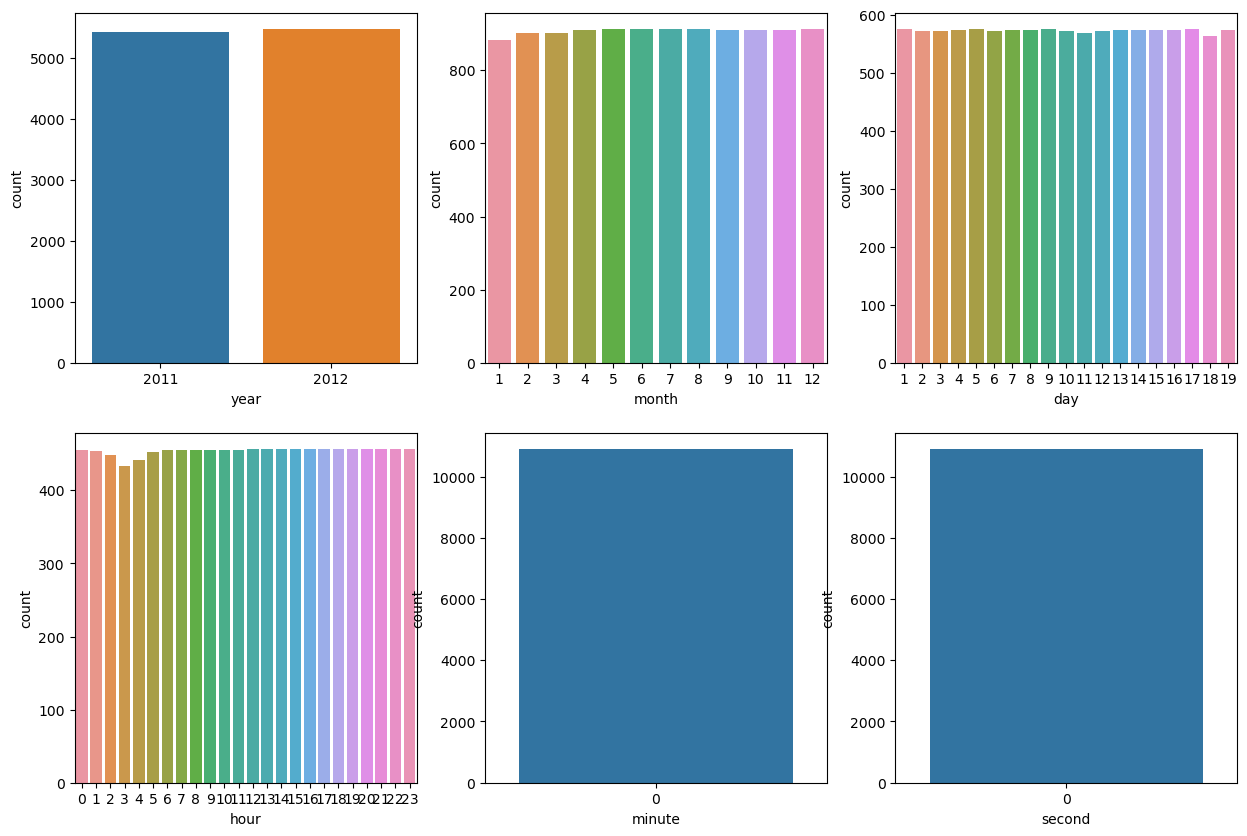

In [15]:
# 2행 3열의 플롯 공간을 만든 후 각 플롯의 크기를 적당하게 지정한다.
# 연, 월, 일, 시, 분, 초마다 count 수를 countplot으로 표현한다. 
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.countplot(data=train, x='year', ax=axes[0, 0])
sns.countplot(data=train, x='month', ax=axes[0, 1])
sns.countplot(data=train, x='day', ax=axes[0, 2])
sns.countplot(data=train, x='hour', ax=axes[1, 0])
sns.countplot(data=train, x='minute', ax=axes[1, 1])
sns.countplot(data=train, x='second', ax=axes[1, 2])

In [9]:
# (중요) 모델을 학습하기 위한 feature로 사용할 특성들을 뽑아준다. 타겟이 되는 count를 label로 지정한다.
X = train[['temp', 'casual', 'month', 'day', 'hour', 'humidity']]
y = train['count']
# train_test_split() 메서드로 데이터셋을 학습 데이터와 테스트 데이터로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# scikit-learn의 LinearRegression()을 모델로 지정한 후 학습 데이터로 모델을 훈련시킨다.
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
# 테스트 데이터을 모델에 넣어 예측을 시행한다. MSE와 RMSE을 손실함수로 지정하여 계산한다.
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("mse:", mse)
print("rmse:", rmse)

In [ ]:
# temp, humidity 특성과 타겟인 count로 각각 실제 데이터와 모델의 예측값을 산점도로 표현한다.
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(X_test['temp'], y_test, label='Actual')
axes[0].scatter(X_test['temp'], y_pred, label='Predicted')
axes[0].set_xlabel('temp')
axes[0].set_ylabel('count')
axes[0].legend()

axes[1].scatter(X_test['humidity'], y_test, label='Actual')
axes[1].scatter(X_test['humidity'], y_pred, label='Predicted')
axes[1].set_xlabel('humidity')
axes[1].set_ylabel('count')
axes[1].legend()

plt.tight_layout()
plt.show()